In [92]:
import numpy as np
import pandas as pd 
np.set_printoptions(threshold=np.inf)

In [93]:
from hmmlearn import hmm
import matplotlib.pyplot as plt

# Hidden Markov Models

## 3.4 Task-3

### 3.4.1 Dataset

In [94]:
data=np.load('rolls.npy')

### 3.4.2 Part 1

In [95]:
split_index = int(0.5 * len(data))

train_data = data[:split_index]
validation_data = data[split_index:]

In [96]:
best_score = best_model = None
n_fits = 50
np.random.seed(13)
for idx in range(n_fits):
    model = hmm.CategoricalHMM(n_components=2,random_state=13)
    model.init_params='t'
    model.startprob_=np.array([1.0, 0.0])
    random_emmision_prob=np.random.dirichlet(np.array([1,1,1,1,1,1]))
    model.emissionprob_ = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],random_emmision_prob])
    model.fit(train_data)
    score = model.score(validation_data)
    if best_score is None or score > best_score:
        best_model = model
        best_score = score


Referred https ://hmmlearn.readthedocs.io/en/latest/auto_examples/plot_casino.html

#### 3.4.2.1 Best Model

In [97]:
print('Best score:',best_score)
print('Best emission probability :\n',best_model.emissionprob_)
print('Best transition matrix :\n',best_model.transmat_)

Best score: -43146.834337869885
Best emission probability :
 [[0.14399272 0.11051381 0.05050343 0.08134483 0.14482089 0.46882432]
 [0.12874483 0.17892308 0.27404585 0.22122375 0.13235106 0.06471144]]
Best transition matrix :
 [[0.64425153 0.35574847]
 [0.54938155 0.45061845]]


#### 3.4.2.2 Most likely sequence of switching between the fair and loaded die

In [98]:
sequence= best_model.decode(validation_data)[1]
print("Most likely sequence of switching between fair and loaded die:\n", sequence)

Most likely sequence of switching between fair and loaded die:
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1
 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1

#### 3.4.2.3 Plot of generated states

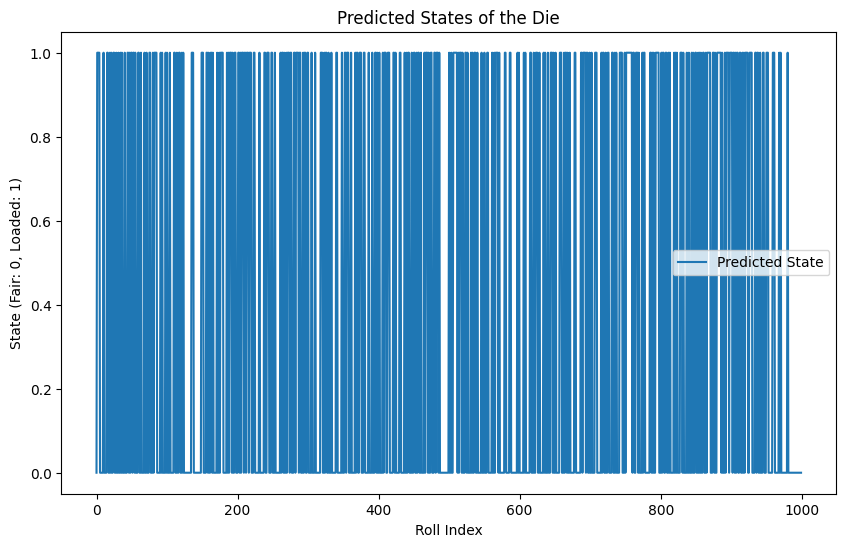

In [99]:
sequence=best_model.sample(30000)[1]
plt.figure(figsize=(10, 6))
plt.plot(sequence[:1000], label='Predicted State')
plt.xlabel('Roll Index')
plt.ylabel('State (Fair: 0, Loaded: 1)')
plt.title('Predicted States of the Die')
plt.legend()
plt.show()

#### 3.4.2.4 What problem in Hidden Markov Models does this task correspond to?

#### Ans -

Learning :- <br>
The model.fit() task corresponds to the problem of learning the parameters of an HMM. It involves determining the best parameters for the model based on observed data.

Decoding :- <br>
The problem of finding the most likely sequence of switching corresponds to the decoding problem in HMMs, where the objective is to reveal the hidden state sequence based on the observed data.

### 3.4.3 Part 2

#### 3.4.3.1 How often do you think the casino is switching out the fair die for the loaded one and vice versa

In [100]:
sequence= best_model.decode(validation_data)[1]
a=0
b=0
for i in range(0,len(sequence)-1):
    if(sequence[i]==0):
        if(sequence[i+1]==1):
            a+=1
    else:
        if(sequence[i+1]==0):
            b+=1
print('Fair to Loaded :',a)
print('Loaded to Fair :',b)

Fair to Loaded : 4472
Loaded to Fair : 4472


#### 3.4.3.2 What problem in Hidden Markov Models does this task correspond to?

#### Ans - 

Decoding :- <br>
The task of estimating the switching frequency corresponds to the problem of decoding in Hidden Markov Models. Decoding involves determining the most likely sequence of hidden states given the observed data

### 3.4.4 Part 3

#### 3.4.4.1 How do you think the loaded die is biased

In [101]:
print('Best Emission probability for loaded die :\n',best_model.emissionprob_[1])

Best Emission probability for loaded die :
 [0.12874483 0.17892308 0.27404585 0.22122375 0.13235106 0.06471144]


#### 3.4.4.2 What problem in Hidden Markov Models does this task correspond to?

#### Ans -

Estimation :- <br>
The problem of understanding how the loaded die is biased corresponds to the problem of parameter estimation in HMMs. Parameter estimation involves determining the values of the model parameters that best explain the observed data.

## 3.5 Task-4

In [102]:
data=np.load('runs.npy')

In [103]:
split_index = int(0.5 * len(data))

train_data = data[:split_index]
validation_data = data[split_index:]

In [104]:
best_score = best_model = None
best_emmision_prob = None
n_fits = 100
for idx in range(n_fits):
    model = hmm.CategoricalHMM(n_components=2)
    model.init_params='s'
    model.transmat_=np.array([[0.7,0.3],[0.3,0.7]])
    emmision_prob_Virat=np.array([0.25,0.35,0.2,0.05,0.1,0,0.05]) # Giving higher weights to 1's and 2's
    emmision_prob_Rohit=np.array([0.3,0.15,0.1,0.05,0.25,0,0.15]) # Giving higher weights to 4's and 6's
    model.emissionprob_ = np.array([emmision_prob_Virat,emmision_prob_Rohit]) 
    model.fit(train_data)
    score = model.score(validation_data)
    if best_score is None or score > best_score:
        best_model = model
        best_score = score

### Optimal transition, emission and start probability for the HMM model

In [105]:
print('Best score:',best_score)
print('Best emission probability :\n',best_model.emissionprob_)
print('Best transition matrix :\n',best_model.transmat_)
print('Best start probability :\n',best_model.startprob_)

Best score: -25532.412815426214
Best emission probability :
 [[0.13361052 0.31250938 0.27165029 0.04900048 0.13923829 0.
  0.09399104]
 [0.11373881 0.11250786 0.11029744 0.045981   0.33967925 0.
  0.27779565]]
Best transition matrix :
 [[0.66086667 0.33913333]
 [0.25150621 0.74849379]]
Best start probability :
 [0.13146501 0.86853499]


### Predict who played the first and the last ball

In [106]:
states = ["Virat", "Rohit"]
predicted_states = model.predict(data)

first_ball_player = states[predicted_states[0]]
last_ball_player = states[predicted_states[-1]]

print("Predicted first ball player :",first_ball_player)
print("Predicted last ball player :",last_ball_player)


Predicted first ball player : Virat
Predicted last ball player : Rohit
